In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/serc-nano-100/med_100.csv
/kaggle/input/serc-nano-100/nano_70.csv
/kaggle/input/serc-nano-100/small_100.csv
/kaggle/input/serc-nano-100/nano_97.csv
/kaggle/input/serc-nano-100/nano_100.csv
/kaggle/input/serc-nano-100/large_100.csv
/kaggle/input/serc-nano-100/nano_50.csv


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

In [80]:
nano_model = pd.read_csv("/kaggle/input/serc-nano-100/nano_100.csv")
nano_model

,total_processed,input_rate,image_quality,file_size(kB),current_model,avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,1,3.005601,100,160.352,yolov5n,0.721736,1,1.556331,16.1,0.059034,0.053143,21.248561,0.057280
1,2,3.846236,100,229.161,yolov5n,0.507850,6,1.609249,64.6,0.060136,0.058417,21.046794,0.155104
2,3,3.523685,100,236.386,yolov5n,0.624531,8,1.376766,53.3,0.057994,0.056423,20.808315,0.249077
3,4,3.609265,100,197.637,yolov5n,0.547537,13,1.152768,53.7,0.051263,0.050030,20.631268,0.329885
4,5,3.473911,100,171.976,yolov5n,0.437539,20,1.712764,62.3,0.061724,0.060092,20.434522,0.427365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,8.137519,100,210.408,yolov5n,0.476134,4,1.198117,52.1,0.034237,0.033102,314.495002,4089.805353
24995,24996,7.994686,100,86.901,yolov5n,0.000000,0,1.139401,61.8,0.031979,0.030885,314.408298,4089.849801
24996,24997,7.936606,100,209.051,yolov5n,0.568840,2,1.306149,55.1,0.036041,0.034864,314.336615,4089.911396
24997,24998,7.475159,100,280.688,yolov5n,0.674120,3,1.271359,50.9,0.035505,0.034341,314.275287,4089.980482


## Data Cleaning

#### _Removing unnecessary columns from the data frame_

In [81]:
nano_model.columns

Index(['total_processed', 'input_rate', 'image_quality', 'file_size(kB)',
       'current_model', 'avg_conf', 'current_boxes', 'energy_consumption(J)',
       'current_cpu', 'measure_duration(s)', 'current_time', 'start_time',
       'absolute_time'],
      dtype='object')

#### _['total_processed', 'input_rate', 'image_quality','current_model']_

In [82]:
nano_model.drop(columns=['total_processed', 'input_rate', 'image_quality','current_model'], inplace=True)
nano_model

,file_size(kB),avg_conf,current_boxes,energy_consumption(J),current_cpu,measure_duration(s),current_time,start_time,absolute_time
0,160.352,0.721736,1,1.556331,16.1,0.059034,0.053143,21.248561,0.057280
1,229.161,0.507850,6,1.609249,64.6,0.060136,0.058417,21.046794,0.155104
2,236.386,0.624531,8,1.376766,53.3,0.057994,0.056423,20.808315,0.249077
3,197.637,0.547537,13,1.152768,53.7,0.051263,0.050030,20.631268,0.329885
4,171.976,0.437539,20,1.712764,62.3,0.061724,0.060092,20.434522,0.427365
...,...,...,...,...,...,...,...,...,...
24994,210.408,0.476134,4,1.198117,52.1,0.034237,0.033102,314.495002,4089.805353
24995,86.901,0.000000,0,1.139401,61.8,0.031979,0.030885,314.408298,4089.849801
24996,209.051,0.568840,2,1.306149,55.1,0.036041,0.034864,314.336615,4089.911396
24997,280.688,0.674120,3,1.271359,50.9,0.035505,0.034341,314.275287,4089.980482


## Descriptive Statistics

#### _Computing descriptive statistics for each column to gain a general understanding of the data distribution. Includes measures such as mean, median, standard deviation, and range._

In [83]:
descriptive_stats = nano_model.describe()

# Transpose the statistics dataframe 
descriptive_stats = descriptive_stats.transpose()

descriptive_stats['Range'] = nano_model.max() - nano_model.min()

# Rename columns 
descriptive_stats = descriptive_stats.rename(columns={
    'mean': 'Mean',
    '50%': 'Median',
    'std': 'Standard Deviation'
})

descriptive_stats.drop(columns=['count', '25%', '75%'])
cols = ['Mean', 'Median', 'Standard Deviation', 'Range', 'min', 'max']
descriptive_stats = descriptive_stats[cols]

# Print the descriptive statistics table
descriptive_stats

,Mean,Median,Standard Deviation,Range,min,max
file_size(kB),237.183498,232.309000,76.846982,627.288000,2.797000,630.085000
avg_conf,0.535623,0.537709,0.186135,0.960649,0.000000,0.960649
current_boxes,5.524221,3.000000,5.557060,65.000000,0.000000,65.000000
energy_consumption(J),1.609611,1.575985,0.400583,4.818651,0.581420,5.400071
current_cpu,55.711580,59.200000,17.438676,93.000000,5.500000,98.500000
measure_duration(s),0.052537,0.051625,0.009622,0.125750,0.020525,0.146275
current_time,0.051027,0.050145,0.009539,0.124434,0.019419,0.143852
start_time,111.590041,53.387284,121.300479,345.361798,0.056385,345.418183
absolute_time,2688.730112,2907.610987,1044.641841,4089.991299,0.057280,4090.048579


In [84]:
descriptive_stats.index

Index(['file_size(kB)', 'avg_conf', 'current_boxes', 'energy_consumption(J)',
       'current_cpu', 'measure_duration(s)', 'current_time', 'start_time',
       'absolute_time'],
      dtype='object')

## Normality Test

#### _To assess the normality of your data_
#### _Making use of a Statistical Test (Anderson-Darling Test) and Visual Test (Histogram and Quantile-Quantile Plot)_
#### _Note: Shapiro-Wilk test is generally robust to violations of normality assumption for large sample sizes_

In [85]:
import scipy.stats as stats

In [86]:
sns.set_style("darkgrid")
sns.set_palette("viridis")

Anderson-Darling Test - Statistic: 0.2432179174634257
Critical Values:
Level 15.0: 0.574
Level 10.0: 0.653
Level 5.0: 0.784
Level 2.5: 0.914
Level 1.0: 1.088


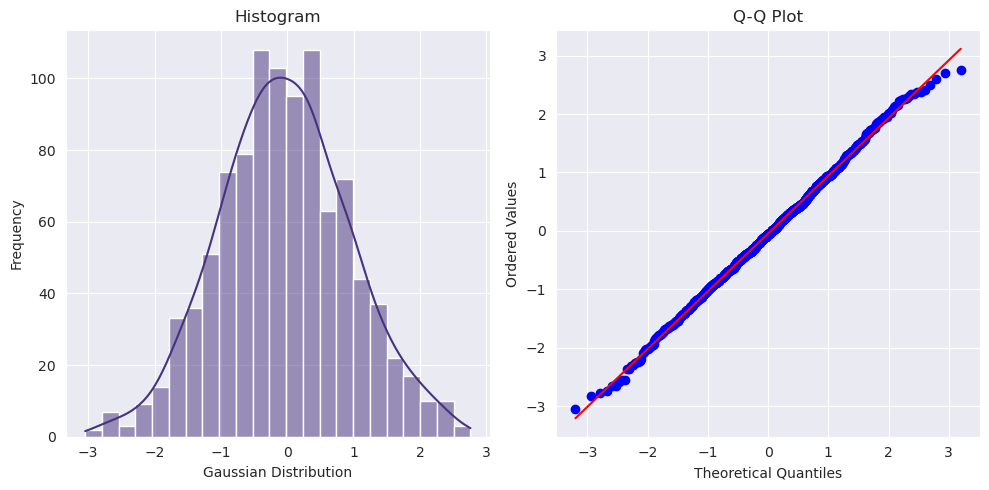

In [87]:
# Gaussian distribution with mean 0 and standard deviation 1
np.random.seed(0)
gaussian_data = np.random.normal(0, 1, 1000)

# Anderson-Darling test
result = stats.anderson(gaussian_data)


statistic = result.statistic
critical_values = result.critical_values
print("Anderson-Darling Test - Statistic:", statistic)
print("Critical Values:")
for i, cv in enumerate(critical_values):
    print(f"Level {result.significance_level[i]}: {cv}")

# Histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(gaussian_data, kde=True, ax=axes[0])
axes[0].set_xlabel('Gaussian Distribution')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

stats.probplot(gaussian_data, plot=axes[1])
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')
axes[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [88]:
skewness = stats.skew(gaussian_data)
print("Skewness:", skewness)

Skewness: 0.03385895323565712


#### _For a distribution to be considered approximately symmetric or close to a normal distribution, a skewness value between -0.5 and 0.5 is often considered acceptable._

In [89]:
INDEX = ['energy_consumption(J)', 'file_size(kB)', 'avg_conf', 'current_boxes', 'current_cpu', 'measure_duration(s)']

Anderson_Darling_STATISTIC = []
Anderson_Darling_LEV1_CRITICAL_VAL = []
Anderson_Darling_LEV2_CRITICAL_VAL = []
Anderson_Darling_LEV5_CRITICAL_VAL = []
Anderson_Darling_LEV10_CRITICAL_VAL = []
Anderson_Darling_LEV15_CRITICAL_VAL = []
SKEWNESS = []
RESULT = []

LEVELS = [Anderson_Darling_LEV15_CRITICAL_VAL, Anderson_Darling_LEV10_CRITICAL_VAL, Anderson_Darling_LEV5_CRITICAL_VAL, Anderson_Darling_LEV2_CRITICAL_VAL, Anderson_Darling_LEV1_CRITICAL_VAL]

### 'Energy_Consumption'

Anderson-Darling Test

Statistic: 227.9042992111863

Critical Values:
Level 15.0 - 0.576
Level 10.0 - 0.656
Level 5.0 - 0.787
Level 2.5 - 0.918
Level 1.0 - 1.092


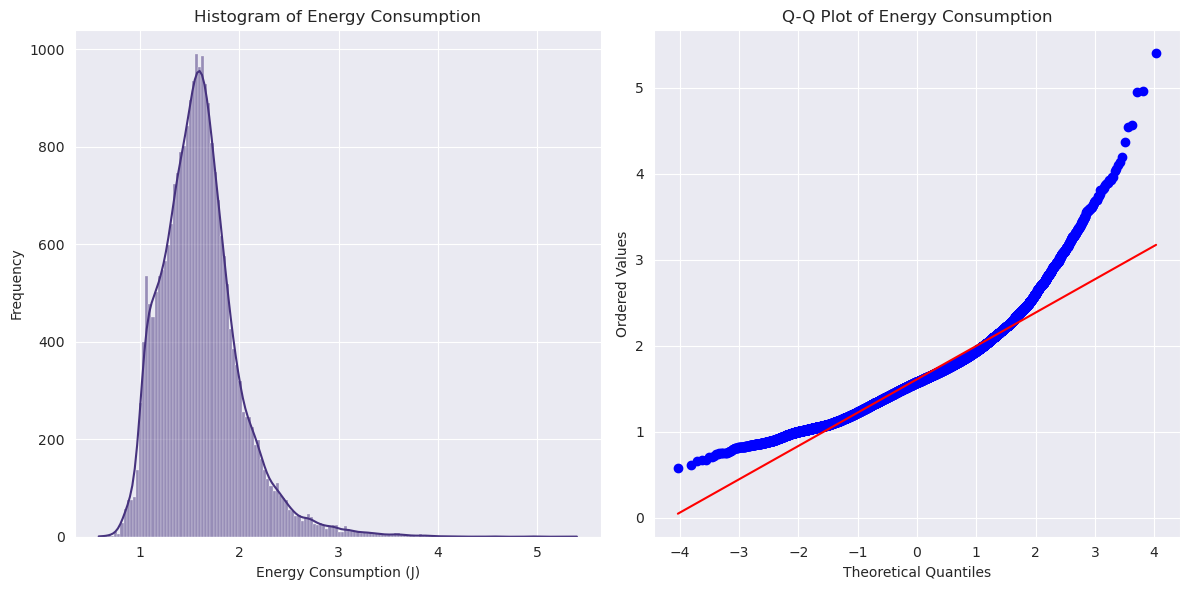

In [90]:
column_data = nano_model['energy_consumption(J)']

# Anderson-Darling test
result = stats.anderson(column_data)

statistic = result.statistic
Anderson_Darling_STATISTIC.append(statistic)
critical_values = result.critical_values
print("Anderson-Darling Test\n\nStatistic:", statistic)
print("\nCritical Values:")
for i, cv in enumerate(critical_values):
    print(f"Level {result.significance_level[i]} - {cv}")
    LEVELS[i].append(cv)

# Histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_xlabel('Energy Consumption (J)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Energy Consumption')

stats.probplot(column_data, plot=axes[1])
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')
axes[1].set_title('Q-Q Plot of Energy Consumption')

plt.tight_layout()
plt.show()

#### _A larger test statistic suggests a greater departure from the normal distribution._
#### _Anderson-Darling test statistic is 227.904, which is significantly larger than the critical values at all significance levels (15.0, 10.0, 5.0, 2.5, and 1.0). This indicates strong evidence against the null hypothesis that the data follows a normal distribution._
#### _Hence we can conclude that the 'energy_consumption(J)' column does not follow a normal distribution._

#### _The critical values provided represent the thresholds at which we would reject the null hypothesis of normality. In this case, the test statistic exceeds all the critical values, indicating a departure from normality at any commonly used significance level._

In [91]:
skewness = column_data.skew()
print("Skewness of Energy Consumption Data:", skewness)
SKEWNESS.append(skewness)
RESULT.append('positively skewed')

Skewness of Energy Consumption Data: 1.2357091457808846


#### _Distribution is positively skewed. This means that the tail of the distribution extends towards higher values, while the majority of the data is concentrated towards the lower end._



### 'file_size'

Anderson-Darling Test

Statistic: 36.761088039642345

Critical Values:
Level 15.0 - 0.576
Level 10.0 - 0.656
Level 5.0 - 0.787
Level 2.5 - 0.918
Level 1.0 - 1.092


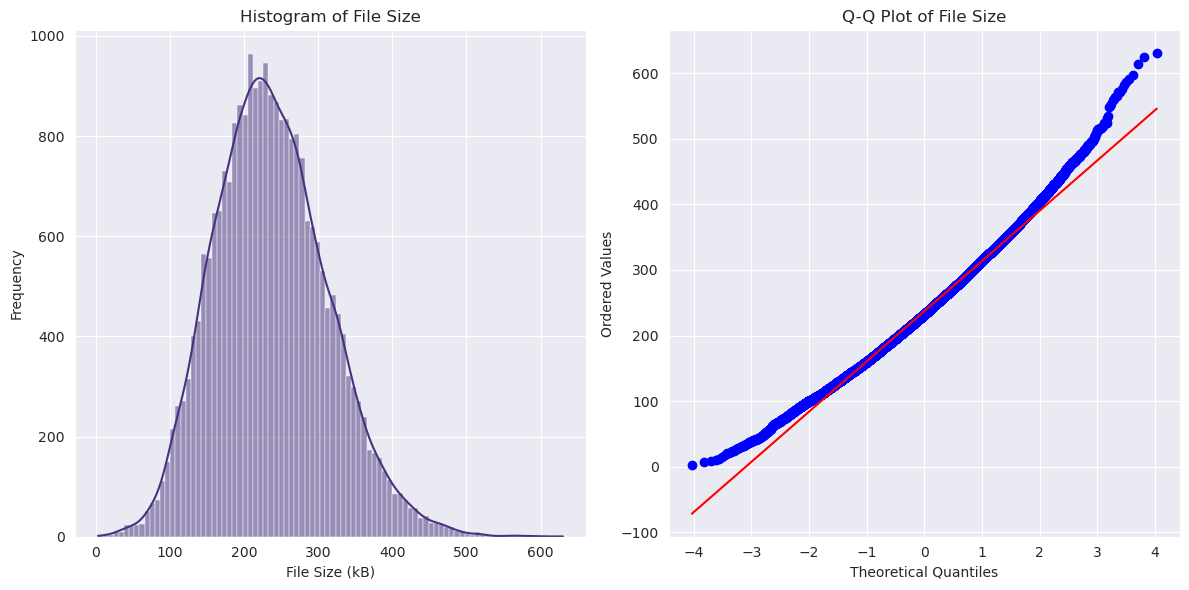

In [92]:
column_data = nano_model['file_size(kB)']

# Anderson-Darling test
result = stats.anderson(column_data)

statistic = result.statistic
Anderson_Darling_STATISTIC.append(statistic)
critical_values = result.critical_values
print("Anderson-Darling Test\n\nStatistic:", statistic)
print("\nCritical Values:")
for i, cv in enumerate(critical_values):
    print(f"Level {result.significance_level[i]} - {cv}")
    LEVELS[i].append(cv)

# Histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_xlabel('File Size (kB)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of File Size')

stats.probplot(column_data, plot=axes[1])
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')
axes[1].set_title('Q-Q Plot of File Size')

plt.tight_layout()
plt.show()

#### _The "file_size" data exhibits some departure from normality based on the Anderson-Darling test._

In [93]:
skewness = column_data.skew()
print("Skewness of file size Data:", skewness)
SKEWNESS.append(skewness)
RESULT.append('approximately symmetric')

Skewness of file size Data: 0.3795308805896514


#### _Skewness values between -0.5 and 0.5 are generally considered to indicate approximate symmetry or a distribution that is close to being normal. In the case of the "file_size" data with a skewness value of 0.3795, the skewness is relatively small and falls within the acceptable range for a distribution to be considered approximately symmetric._

### 'avg_conf'

Anderson-Darling Test

Statistic: 293.62130528763373

Critical Values:
Level 15.0 - 0.576
Level 10.0 - 0.656
Level 5.0 - 0.787
Level 2.5 - 0.918
Level 1.0 - 1.092


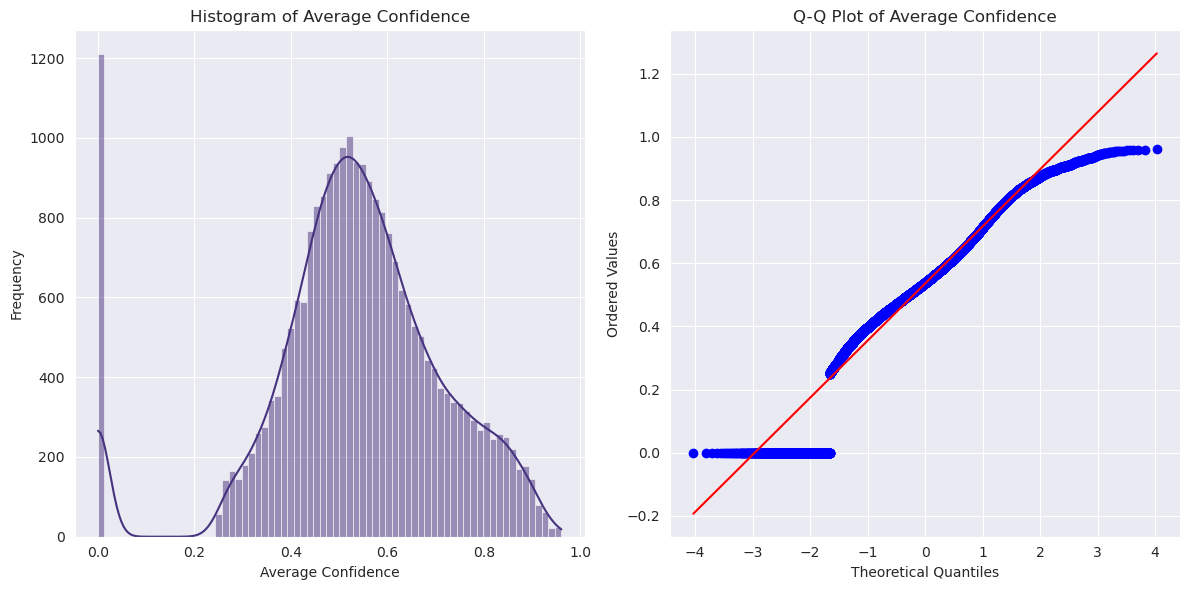

In [94]:
column_data = nano_model['avg_conf']

# Anderson-Darling test
result = stats.anderson(column_data)

statistic = result.statistic
Anderson_Darling_STATISTIC.append(statistic)
critical_values = result.critical_values
print("Anderson-Darling Test\n\nStatistic:", statistic)
print("\nCritical Values:")
for i, cv in enumerate(critical_values):
    print(f"Level {result.significance_level[i]} - {cv}")
    LEVELS[i].append(cv)

# Histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_xlabel('Average Confidence')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Average Confidence')

stats.probplot(column_data, plot=axes[1])
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')
axes[1].set_title('Q-Q Plot of Average Confidence')

plt.tight_layout()
plt.show()

#### _The Anderson-Darling test statistic is much larger than the critical values at all significance levels. This indicates strong evidence against the null hypothesis of the data following a normal distribution._

#### _Based on these results, we can conclude that the "avg_conf" column does not follow a normal distribution. The data likely exhibits a significant departure from normality._

In [95]:
skewness = column_data.skew()
print("Skewness of Avg Confidence Data:", skewness)
SKEWNESS.append(skewness)
RESULT.append('slightly negatively skewed')

Skewness of Avg Confidence Data: -0.7314615542283516


#### _Slightly negatively skewed_

### 'current_boxes'

Anderson-Darling Test

Statistic: 1413.7861111258098

Critical Values:
Level 15.0 - 0.576
Level 10.0 - 0.656
Level 5.0 - 0.787
Level 2.5 - 0.918
Level 1.0 - 1.092


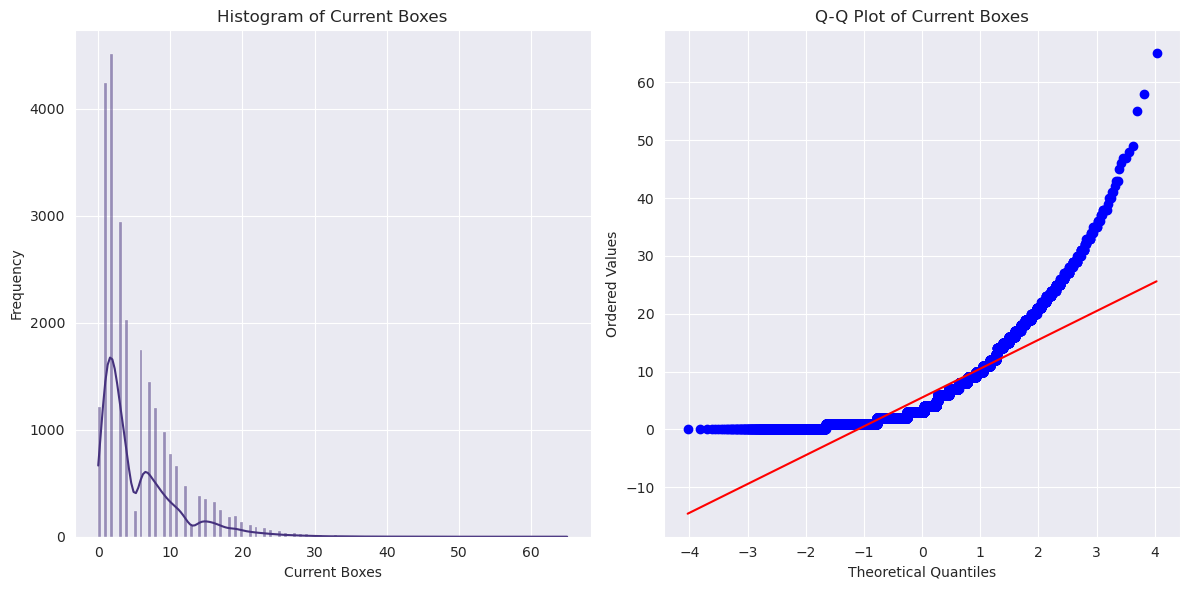

In [96]:
column_data = nano_model['current_boxes']

# Anderson-Darling test
result = stats.anderson(column_data)

statistic = result.statistic
Anderson_Darling_STATISTIC.append(statistic)
critical_values = result.critical_values
print("Anderson-Darling Test\n\nStatistic:", statistic)
print("\nCritical Values:")
for i, cv in enumerate(critical_values):
    print(f"Level {result.significance_level[i]} - {cv}")
    LEVELS[i].append(cv)

# Histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_xlabel('Current Boxes')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Current Boxes')

stats.probplot(column_data, plot=axes[1])
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')
axes[1].set_title('Q-Q Plot of Current Boxes')

plt.tight_layout()
plt.show()

#### _This indicates strong evidence against the null hypothesis of the data following a normal distribution._

#### _Based on these results, we can conclude that the "current_boxes" data does not follow a normal distribution._

In [97]:
skewness = column_data.skew()
print("Skewness of Avg Confidence Data:", skewness)
SKEWNESS.append(skewness)
RESULT.append('positively skewed')

Skewness of Avg Confidence Data: 1.946503588128551


#### _Distribution is positively skewed._

### 'current_cpu'

Anderson-Darling Test

Statistic: 1429.784377353033

Critical Values:
Level 15.0 - 0.576
Level 10.0 - 0.656
Level 5.0 - 0.787
Level 2.5 - 0.918
Level 1.0 - 1.092


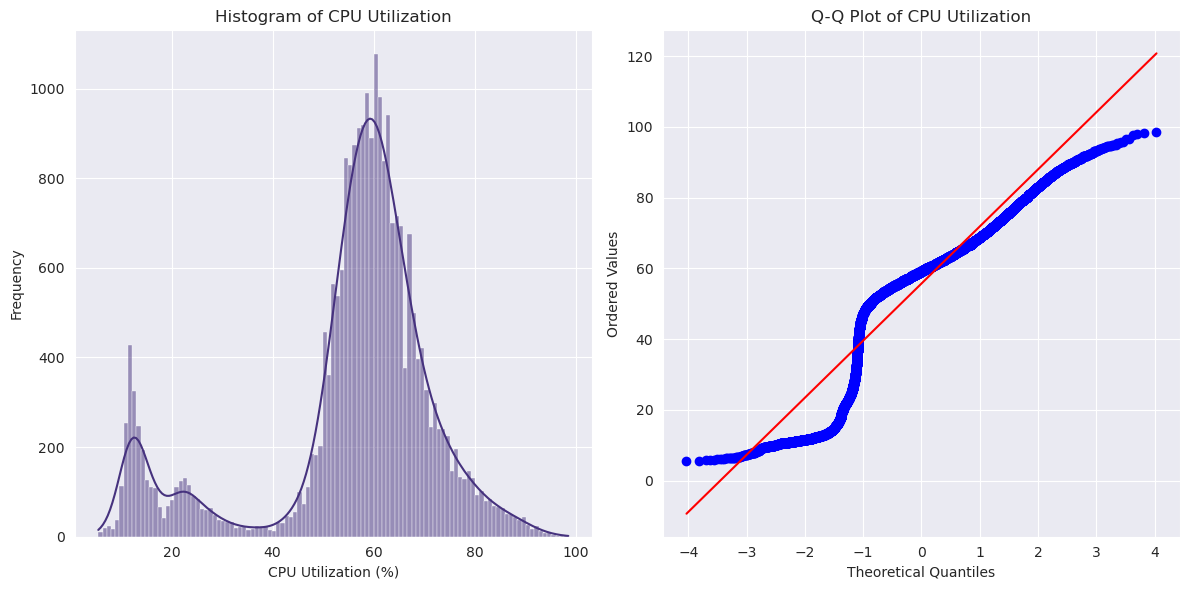

In [98]:
column_data = nano_model['current_cpu']

# Anderson-Darling test
result = stats.anderson(column_data)

statistic = result.statistic
Anderson_Darling_STATISTIC.append(statistic)
critical_values = result.critical_values
print("Anderson-Darling Test\n\nStatistic:", statistic)
print("\nCritical Values:")
for i, cv in enumerate(critical_values):
    print(f"Level {result.significance_level[i]} - {cv}")
    LEVELS[i].append(cv)

# Histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_xlabel('CPU Utilization (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of CPU Utilization')

stats.probplot(column_data, plot=axes[1])
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')
axes[1].set_title('Q-Q Plot of CPU Utilization')

plt.tight_layout()
plt.show()

#### _This indicates strong evidence against the null hypothesis of the data following a normal distribution._

#### _Based on these results, we can conclude that the "current_cpu" data does not follow a normal distribution._

In [99]:
skewness = column_data.skew()
print("Skewness of CPU Utilization Data:", skewness)
SKEWNESS.append(skewness)
RESULT.append('negatively skewed')

Skewness of CPU Utilization Data: -1.2111392634903781


#### _Distribution is negatively skewed._

### 'measure_duration(s)'

Anderson-Darling Test

Statistic: 420.7937042830454

Critical Values:
Level 15.0 - 0.576
Level 10.0 - 0.656
Level 5.0 - 0.787
Level 2.5 - 0.918
Level 1.0 - 1.092


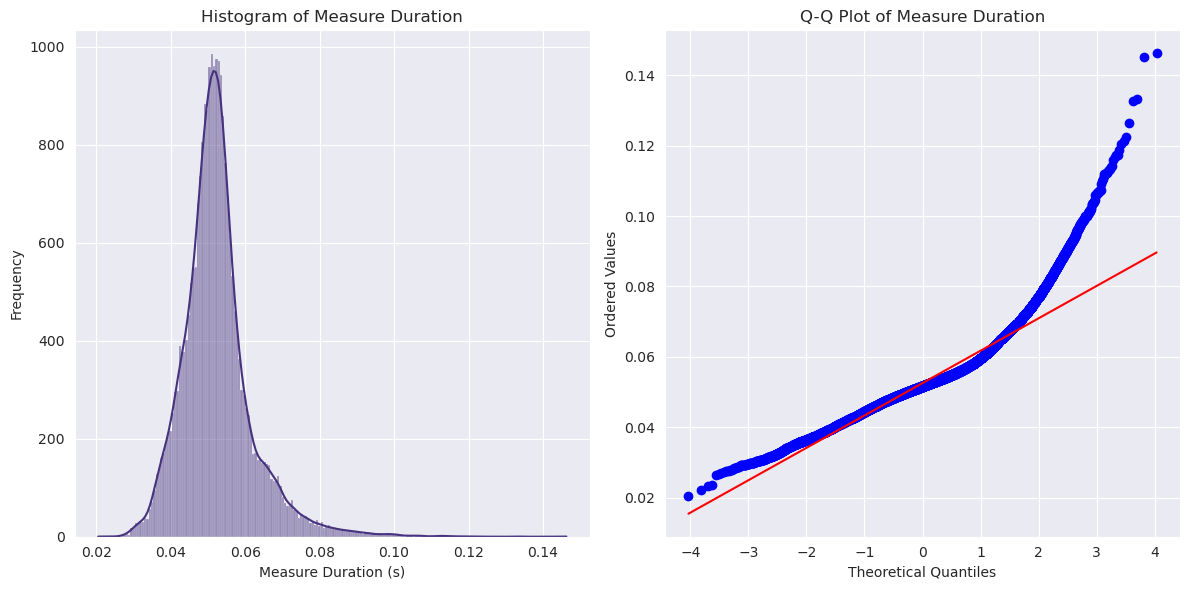

In [100]:
column_data = nano_model['measure_duration(s)']

# Anderson-Darling test
result = stats.anderson(column_data)

statistic = result.statistic
Anderson_Darling_STATISTIC.append(statistic)
critical_values = result.critical_values
print("Anderson-Darling Test\n\nStatistic:", statistic)
print("\nCritical Values:")
for i, cv in enumerate(critical_values):
    print(f"Level {result.significance_level[i]} - {cv}")
    LEVELS[i].append(cv)

# Histogram and Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(column_data, kde=True, ax=axes[0])
axes[0].set_xlabel('Measure Duration (s)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Measure Duration')

stats.probplot(column_data, plot=axes[1])
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')
axes[1].set_title('Q-Q Plot of Measure Duration')

plt.tight_layout()
plt.show()

#### _This indicates strong evidence against the null hypothesis of the data following a normal distribution._

#### _Based on these results, we can conclude that the "measure_duration(s)" data does not follow a normal distribution._

In [101]:
skewness = column_data.skew()
print("Skewness of Avg Confidence Data:", skewness)
SKEWNESS.append(skewness)
RESULT.append('positively skewed')

Skewness of Avg Confidence Data: 1.4409729782548695


#### _Distribution is positively skewed._

In [102]:
Anderson_Darling_LEV2_CRITICAL_VAL

[0.918, 0.918, 0.918, 0.918, 0.918, 0.918]

In [103]:
cols = pd.MultiIndex.from_tuples([('Anderson Darling Test', 'statistic', ''),
                          ('Anderson Darling Test', 'critical value', 'level 1'),
                          ('Anderson Darling Test', 'critical value', 'level 2'),
                          ('Anderson Darling Test', 'critical value', 'level 5'),
                          ('Anderson Darling Test', 'critical value', 'level 10'),
                          ('Anderson Darling Test', 'critical value', 'level 15'),
                          ('skewness', '', ''),
                          ('results', '', '')])
normality_test = pd.DataFrame(list(zip(Anderson_Darling_STATISTIC, Anderson_Darling_LEV1_CRITICAL_VAL, Anderson_Darling_LEV2_CRITICAL_VAL, Anderson_Darling_LEV5_CRITICAL_VAL, Anderson_Darling_LEV10_CRITICAL_VAL, Anderson_Darling_LEV15_CRITICAL_VAL, SKEWNESS, RESULT)), 
                  columns = cols, index = INDEX)
normality_test

Anderson Darling Test                                 \
                                  statistic critical value                   
                                                   level 1 level 2 level 5   
energy_consumption(J)            227.904299          1.092   0.918   0.787   
file_size(kB)                     36.761088          1.092   0.918   0.787   
avg_conf                         293.621305          1.092   0.918   0.787   
current_boxes                   1413.786111          1.092   0.918   0.787   
current_cpu                     1429.784377          1.092   0.918   0.787   
measure_duration(s)              420.793704          1.092   0.918   0.787   

                                         skewness                     results  
                                                                               
                      level 10 level 15                                        
energy_consumption(J)    0.656    0.576  1.235709           positively skewed  
file_size(kB)            0.656    0.576  0.379531     approximately symmetric  
avg_conf                 0.656    0.576 -0.731462  slightly negatively skewed  
current_boxes            0.656    0.576  1.946504           positively skewed  
current_cpu              0.656    0.576 -1.211139           negatively skewed  
measure_duration(s)      0.656    0.576  1.440973           positively skewed

In [104]:
print(normality_test)

                      Anderson Darling Test                                 \
                                  statistic critical value                   
                                                   level 1 level 2 level 5   
energy_consumption(J)            227.904299          1.092   0.918   0.787   
file_size(kB)                     36.761088          1.092   0.918   0.787   
avg_conf                         293.621305          1.092   0.918   0.787   
current_boxes                   1413.786111          1.092   0.918   0.787   
current_cpu                     1429.784377          1.092   0.918   0.787   
measure_duration(s)              420.793704          1.092   0.918   0.787   

                                         skewness                     results  
                                                                               
                      level 10 level 15                                        
energy_consumption(J)    0.656    0.576  1.235709        

## Transformation

#### _1. energy_consumption(J): For positive skewness, we can consider applying a logarithmic transformation or a Box-Cox transformation._

#### _2. file_size(kB): As the skewness is already close to zero and the distribution appears to be approximately symmetric, no transformation may be necessary._

#### _3. avg_conf: To address the negative skewness, we can consider applying a power transformation, such as a square root or Box-Cox transformation._

#### _4. current_boxes: Similar to "energy_consumption(J)", a logarithmic transformation or a Box-Cox transformation may be appropriate for addressing the positive skewness._

#### _5. current_cpu: To address the negative skewness, we can consider applying a power transformation, such as a square root or Box-Cox transformation._

#### _6. measure_duration(s): Similar to "energy_consumption(J)" and "current_boxes", a logarithmic transformation or a Box-Cox transformation may be suitable for addressing the positive skewness._

In [ ]:
# logarithmic transformation
trans_energy_consumption = np.log(nano_model['energy_consumption(J)'])

# square root transformation
trans_avg_conf = np.sqrt(nano_model['avg_conf'])

# logarithmic transformation
trans_current_boxes = np.log(nano_model['current_boxes'])

# square root transformation
trans_current_cpu = np.sqrt(nano_model['current_cpu'])

# logarithmic transformation
trans_measure_duration = np.log(nano_model['measure_duration(s)'])

In [ ]:
# Creating a DataFrame with the transformed variables
transformed_df = pd.DataFrame({
    'energy_consumption_transformed': transformed_energy,
    'file_size_transformed': df['file_size(kB)'],
    'avg_conf_transformed': transformed_avg_conf,
    'current_boxes_transformed': transformed_boxes,
    'current_cpu_transformed': transformed_cpu,
    'measure_duration_transformed': transformed_duration
})

## Correlation Analysis

In [ ]:
# Calculate correlation matrix
correlation_matrix = transformed_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
